In [1]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c7849a16-5ba7-44e3-967e-fd221772820b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-09-13T04:31:55.067Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 9834}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11677, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [2]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



In [3]:
import datetime

df=pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

C:\Users\bulsa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11677,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975342e+07,1.975342e+07,False,NaN,1,NaN,NaN,None,2024-09-13T04:30:00.000Z,57968.358849,3.125209e+10,-15.5272,-0.083601,-0.700498,2.299019,-5.217965,-7.440521,-12.425656,1.145073e+12,56.1505,1.217336e+12,None,2024-09-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:32:07.806489
1,1027,Ethereum,ETH,ethereum,9275,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203326e+08,1.203326e+08,True,NaN,2,NaN,NaN,None,2024-09-13T04:29:00.000Z,2358.366972,1.103603e+10,-28.2477,-0.033498,-0.697575,-1.337719,-13.197097,-29.316673,-32.674258,2.837885e+11,13.9166,2.837885e+11,None,2024-09-13T04:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:32:07.806489
2,825,Tether USDt,USDT,tether,97048,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.183774e+11,1.202378e+11,True,NaN,3,NaN,NaN,None,2024-09-13T04:29:00.000Z,1.000012,4.625364e+10,-13.9812,0.008146,-0.011582,0.024738,-0.068274,-0.061571,0.031178,1.183788e+11,5.8054,1.202393e+11,None,2024-09-13T04:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-13 04:32:07.806489
3,1839,BNB,BNB,bnb,2228,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459342e+08,1.459342e+08,False,NaN,4,NaN,NaN,None,2024-09-13T04:29:00.000Z,543.610071,1.650965e+09,-5.6362,-0.047067,-0.282000,7.514011,3.209708,-2.043666,-10.205350,7.933129e+10,3.8903,7.933129e+10,None,2024-09-13T04:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:32:07.806489
4,5426,Solana,SOL,solana,729,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.681553e+08,5.844537e+08,True,NaN,5,NaN,NaN,None,2024-09-13T04:29:00.000Z,134.696653,1.370591e+09,-36.2138,-0.096906,-0.934510,3.040988,-7.103930,-11.045112,-6.732960,6.305895e+10,3.0923,7.872395e+10,None,2024-09-13T04:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:32:07.806489
5,3408,USDC,USDC,usd-coin,21927,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.540605e+10,3.540605e+10,False,NaN,6,NaN,NaN,None,2024-09-13T04:29:00.000Z,0.999972,5.154762e+09,-17.8806,0.007132,0.002595,-0.004031,-0.011763,-0.014529,-0.027212,3.540505e+10,1.7362,3.540505e+10,None,2024-09-13T04:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-13 04:32:07.806489
6,52,XRP,XRP,xrp,1378,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.638602e+10,9.998722e+10,False,NaN,7,NaN,NaN,None,2024-09-13T04:30:00.000Z,0.565177,1.684140e+09,93.4216,0.993083,4.926038,3.579223,-2.437829,7.006726,18.450502,3.186810e+10,1.5628,5.651772e+10,None,2024-09-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:32:07.806489
7,74,Dogecoin,DOGE,dogecoin,1058,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.459344e+11,1.459344e+11,True,NaN,8,NaN,NaN,None,2024-09-13T04:30:00.000Z,0.102031,4.210604e+08,-19.4589,-0.140757,-0.737174,3.410751,-3.822550,-13.467058,-24.713129,1.488989e+10,0.7302,1.488989e+10,None,2024-09-13T04:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:32:07.806489
8,11419,Toncoin,TON,toncoin,548,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",Na

In [5]:
def api_runner():
    
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c7849a16-5ba7-44e3-967e-fd221772820b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
  
    df=pd.json_normalize(data['data'])

    df['timestamp'] = pd.to_datetime('now')
    df
    
    
    if not os.path.isfile(r'C:\Users\bulsa\New folder\API.csv'):
        df.to_csv(r'C:\Users\bulsa\New folder\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\bulsa\New folder\API.csv', mode='a', header=False)
    
   

        
         
        
        

  

In [61]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()


C:\Users\bulsa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed successfully


C:\Users\bulsa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed successfully


C:\Users\bulsa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed successfully


KeyboardInterrupt: 

In [8]:
df3=pd.read_csv(r"C:\Users\bulsa\New folder\API.csv")
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11677,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.975342e+07,1.975342e+07,False,NaN,1,NaN,NaN,NaN,2024-09-13T04:36:00.000Z,57927.598156,3.121920e+10,-15.5690,-0.062677,-0.679798,2.192381,-5.215312,-7.322502,-12.472240,1.144268e+12,56.1017,1.216480e+12,NaN,2024-09-13T04:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:36:51.948639
1,1,1027,Ethereum,ETH,ethereum,9275,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203326e+08,1.203326e+08,True,NaN,2,NaN,NaN,NaN,2024-09-13T04:35:00.000Z,2355.731429,1.103184e+10,-28.2012,-0.107668,-0.757387,-1.518393,-13.209613,-29.367642,-32.663338,2.834714e+11,13.8990,2.834714e+11,NaN,2024-09-13T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:36:51.948639
2,2,825,Tether USDt,USDT,tether,97050,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.183774e+11,1.202378e+11,True,NaN,3,NaN,NaN,NaN,2024-09-13T04:35:00.000Z,1.000176,4.622157e+10,-13.9953,0.024322,0.012997,0.040132,-0.059114,-0.040472,0.069192,1.183983e+11,5.8032,1.202590e+11,NaN,2024-09-13T04:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-13 04:36:51.948639
3,3,1839,BNB,BNB,bnb,2228,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459342e+08,1.459342e+08,False,NaN,4,NaN,NaN,NaN,2024-09-13T04:35:00.000Z,543.677163,1.650152e+09,-5.7262,-0.054170,-0.210458,7.414864,3.185361,-1.897286,-10.090063,7.934108e+10,3.8905,7.934108e+10,NaN,2024-09-13T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:36:51.948639
4,4,5426,Solana,SOL,solana,729,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.681553e+08,5.844537e+08,True,NaN,5,NaN,NaN,NaN,2024-09-13T04:35:00.000Z,134.639477,1.361897e+09,-36.5512,-0.044629,-0.747599,2.932281,-7.171094,-11.033465,-6.648803,6.303218e+10,3.0908,7.869054e+10,NaN,2024-09-13T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:36:51.948639
5,5,3408,USDC,USDC,usd-coin,21927,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.540605e+10,3.540605e+10,False,NaN,6,NaN,NaN,NaN,2024-09-13T04:35:00.000Z,1.000146,5.142352e+09,-18.0920,0.026575,0.030383,0.017609,-0.023506,0.005494,0.005955,3.541123e+10,1.7363,3.541123e+10,NaN,2024-09-13T04:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-13 04:36:51.948639
6,6,52,XRP,XRP,xrp,1378,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.638602e+10,9.998722e+10,False,NaN,7,NaN,NaN,NaN,2024-09-13T04:36:00.000Z,0.566535,1.695649e+09,94.6449,1.131617,5.160442,3.815212,-2.233445,7.158633,18.821743,3.194463e+10,1.5657,5.665346e+10,NaN,2024-09-13T04:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:36:51.948639
7,7,74,Dogecoin,DOGE,dogecoin,1058,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.459347e+11,1.459347e+11,True,NaN,8,NaN,NaN,NaN,2024-09-13T04:36:00.000Z,0.102077,4.203232e+08,-19.3723,-0.009847,-0.637548,3.522790,-3.782603,-13.143852,-24.600250,1.489656e+10,0.7302,1.489656e+10,NaN,2024-09-13T04:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 04:36:51.948639
8,8,11419,Toncoin,TON,toncoin,548,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 

In [62]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11677,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19753431.00000,19753431.00000,False,NaN,1,NaN,NaN,None,2024-09-13T05:16:00.000Z,57887.14729,31018689673.58402,-15.45910,-0.12363,-0.41681,2.39462,-5.23498,-7.75542,-12.62260,1143469769685.85156,56.13720,1215630092990.07007,None,2024-09-13T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
1,1027,Ethereum,ETH,ethereum,9275,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120332633.33032,120332633.33032,True,NaN,2,NaN,NaN,None,2024-09-13T05:15:00.000Z,2350.55814,10997049050.85626,-27.63860,-0.27933,-0.57331,-1.32915,-14.28978,-29.54934,-33.05612,282848850770.23352,13.88930,282848850770.22998,None,2024-09-13T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
2,825,Tether USDt,USDT,tether,97053,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118377416456.80840,120237807293.79182,True,NaN,3,NaN,NaN,None,2024-09-13T05:15:00.000Z,0.99992,46103067872.98837,-13.48040,-0.01094,-0.01553,0.00098,-0.07844,-0.08653,0.05160,118367619131.25949,5.80850,120227855995.84000,None,2024-09-13T05:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-13 05:17:13.798699
3,1839,BNB,BNB,bnb,2228,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145934175.71877,145934175.71877,False,NaN,4,NaN,NaN,None,2024-09-13T05:15:00.000Z,540.99319,1641296632.55182,-6.22270,-0.42011,-0.39427,6.75882,2.52447,-2.30398,-10.89595,78949395771.83090,3.87360,78949395771.83000,None,2024-09-13T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
4,5426,Solana,SOL,solana,729,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468155177.91218,584453608.64812,True,NaN,5,NaN,NaN,None,2024-09-13T05:15:00.000Z,134.62797,1351935225.65832,-35.76840,0.05658,-0.18009,3.44563,-7.22948,-11.41417,-7.18541,63026781565.65769,3.09230,78683803288.91000,None,2024-09-13T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
5,3408,USDC,USDC,usd-coin,21927,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35407250010.20161,35407250010.20161,False,NaN,6,NaN,NaN,None,2024-09-13T05:15:00.000Z,0.99990,5139815529.62749,-17.35960,-0.00461,-0.00248,-0.01301,-0.00613,-0.03095,-0.00543,35403859866.09281,1.73850,35403859866.09000,None,2024-09-13T05:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-13 05:17:13.798699
6,52,XRP,XRP,xrp,1378,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56386022594.00000,99987224458.00000,False,NaN,7,NaN,NaN,None,2024-09-13T05:16:00.000Z,0.57212,1770211736.73186,106.50110,1.79287,6.58536,5.11302,-1.15557,7.83300,19.75931,32259352318.82168,1.58300,57211611734.17000,None,2024-09-13T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
7,74,Dogecoin,DOGE,dogecoin,1058,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145935056383.70511,145935056383.70511,True,NaN,8,NaN,NaN,None,2024-09-13T05:16:00.000Z,0.10358,448482180.72396,-12.02780,1.55561,0.90472,5.17843,-2.47587,-12.16865,-23.86664,15116457455.89887,0.74190,15116457455.90000,None,2024-09-13T05:16:0

In [14]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [63]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11677,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19753431.00000,19753431.00000,False,NaN,1,NaN,NaN,None,2024-09-13T05:16:00.000Z,57887.14729,31018689673.58402,-15.45910,-0.12363,-0.41681,2.39462,-5.23498,-7.75542,-12.62260,1143469769685.85156,56.13720,1215630092990.07007,None,2024-09-13T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
1,1027,Ethereum,ETH,ethereum,9275,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120332633.33032,120332633.33032,True,NaN,2,NaN,NaN,None,2024-09-13T05:15:00.000Z,2350.55814,10997049050.85626,-27.63860,-0.27933,-0.57331,-1.32915,-14.28978,-29.54934,-33.05612,282848850770.23352,13.88930,282848850770.22998,None,2024-09-13T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
2,825,Tether USDt,USDT,tether,97053,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118377416456.80840,120237807293.79182,True,NaN,3,NaN,NaN,None,2024-09-13T05:15:00.000Z,0.99992,46103067872.98837,-13.48040,-0.01094,-0.01553,0.00098,-0.07844,-0.08653,0.05160,118367619131.25949,5.80850,120227855995.84000,None,2024-09-13T05:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-13 05:17:13.798699
3,1839,BNB,BNB,bnb,2228,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145934175.71877,145934175.71877,False,NaN,4,NaN,NaN,None,2024-09-13T05:15:00.000Z,540.99319,1641296632.55182,-6.22270,-0.42011,-0.39427,6.75882,2.52447,-2.30398,-10.89595,78949395771.83090,3.87360,78949395771.83000,None,2024-09-13T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
4,5426,Solana,SOL,solana,729,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468155177.91218,584453608.64812,True,NaN,5,NaN,NaN,None,2024-09-13T05:15:00.000Z,134.62797,1351935225.65832,-35.76840,0.05658,-0.18009,3.44563,-7.22948,-11.41417,-7.18541,63026781565.65769,3.09230,78683803288.91000,None,2024-09-13T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
5,3408,USDC,USDC,usd-coin,21927,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35407250010.20161,35407250010.20161,False,NaN,6,NaN,NaN,None,2024-09-13T05:15:00.000Z,0.99990,5139815529.62749,-17.35960,-0.00461,-0.00248,-0.01301,-0.00613,-0.03095,-0.00543,35403859866.09281,1.73850,35403859866.09000,None,2024-09-13T05:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-13 05:17:13.798699
6,52,XRP,XRP,xrp,1378,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56386022594.00000,99987224458.00000,False,NaN,7,NaN,NaN,None,2024-09-13T05:16:00.000Z,0.57212,1770211736.73186,106.50110,1.79287,6.58536,5.11302,-1.15557,7.83300,19.75931,32259352318.82168,1.58300,57211611734.17000,None,2024-09-13T05:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-13 05:17:13.798699
7,74,Dogecoin,DOGE,dogecoin,1058,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145935056383.70511,145935056383.70511,True,NaN,8,NaN,NaN,None,2024-09-13T05:16:00.000Z,0.10358,448482180.72396,-12.02780,1.55561,0.90472,5.17843,-2.47587,-12.16865,-23.86664,15116457455.89887,0.74190,15116457455.90000,None,2024-09-13T05:16:0

In [18]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06268,-0.67980,2.19238,-5.21531,-7.32250,-12.47224
Ethereum,-0.09464,-0.75166,-1.52518,-13.23311,-29.32696,-32.66229
Tether USDt,0.01756,0.01686,0.04505,-0.01649,-0.02954,0.06817
BNB,-0.04069,-0.21576,7.41406,3.19093,-1.86301,-10.10435
Solana,-0.04962,-0.75945,2.91368,-7.14519,-11.04301,-6.65382
USDC,0.02398,0.04087,0.03177,0.02388,0.02537,0.01467
XRP,1.55586,5.70075,4.26374,-1.81208,7.44694,19.36538
Dogecoin,0.04388,-0.58216,3.51345,-3.75684,-13.04593,-24.59093
Toncoin,-0.19812,1.96734,14.05450,-16.42106,-26.30263,-31.01091


In [20]:
df4=df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.06268
              quote.USD.percent_change_24h    -0.67980
              quote.USD.percent_change_7d      2.19238
              quote.USD.percent_change_30d    -5.21531
              quote.USD.percent_change_60d    -7.32250
              quote.USD.percent_change_90d   -12.47224
Ethereum      quote.USD.percent_change_1h     -0.09464
              quote.USD.percent_change_24h    -0.75166
              quote.USD.percent_change_7d     -1.52518
              quote.USD.percent_change_30d   -13.23311
              quote.USD.percent_change_60d   -29.32696
              quote.USD.percent_change_90d   -32.66229
Tether USDt   quote.USD.percent_change_1h      0.01756
              quote.USD.percent_change_24h     0.01686
              quote.USD.percent_change_7d      0.04505
              quote.USD.percent_change_30d    -0.01649
              quote.USD.percent_change_60d    -0.02954
              quote.US

In [22]:
type(df4)

pandas.core.series.Series

In [24]:
df5=df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.06268
             quote.USD.percent_change_24h  -0.67980
             quote.USD.percent_change_7d    2.19238
             quote.USD.percent_change_30d  -5.21531
             quote.USD.percent_change_60d  -7.32250
             quote.USD.percent_change_90d -12.47224
Ethereum     quote.USD.percent_change_1h   -0.09464
             quote.USD.percent_change_24h  -0.75166
             quote.USD.percent_change_7d   -1.52518
             quote.USD.percent_change_30d -13.23311
             quote.USD.percent_change_60d -29.32696
             quote.USD.percent_change_90d -32.66229
Tether USDt  quote.USD.percent_change_1h    0.01756
             quote.USD.percent_change_24h   0.01686
             quote.USD.percent_change_7d    0.04505
             quote.USD.percent_change_30d  -0.01649
             quote.USD.percent_change_60d  -0.02954
             quote.USD.percent_change_90d   0.06817
BNB          quote.USD.percent_change_1h   -0.04069
             quote.USD.percent_change_24h  -0.21576
             quote.USD.percent_change_7d    7.41406
             quote.USD.percent_change_30d   3.19093
             quote.USD.percent_change_60d  -1.86301
             quote.USD.percent_change_90d -10.10435
Solana       quote.USD.percent_change_1h   -0.04962
             quote.USD.percent_change_24h  -0.75945
             quote.USD.percent_change_7d    2.91368
             quote.USD.percent_change_30d  -7.14519
             quote.USD.percent_change_60d -11.04301
             quote.USD.percent_change_90d  -6.65382
USDC         quote.USD.percent_change_1h    0.02398
             quote.USD.percent_change_24h   0.04087
             quote.USD.percent_change_7d    0.03177
             quote.USD.percent_change_30d   0.02388
             quote.USD.percent_change_60d   0.02537
             quote.USD.percent_change_90d   0.01467
XRP          quote.USD.percent_change_1h    1.55586
             quote.USD.percent_change_24h   5.70075
             quote.USD.percent_change_7d    4.26374
             quote.USD.percent_change_30d  -1.81208
             quote.USD.percent_change_60d   7.44694
             quote.USD.percent_change_90d  19.36538
Dogecoin     quote.USD.percent_change_1h    0.04388
             quote.USD.percent_change_24h  -0.58216
             quote.USD.percent_change_7d    3.51345
             quote.USD.percent_change_30d  -3.75684
             quote.USD.percent_change_60d -13.04593
             quote.USD.percent_change_90d -24.59093
Toncoin      quote.USD.percent_change_1h   -0.19812
             quote.USD.percent_change_24h   1.96734
             quote.USD.percent_change_7d   14.05450
             quote.USD.percent_change_30d -16.42106
             quote.USD.percent_change_60d -26.30263
             quote.USD.percent_change_90d -31.01091
TRON         quote.USD.percent_change_1h   -0.05742
             quote.USD.percent_change_24h  -1.49625
             quote.USD.percent_change_7d    1.17190
             quote.USD.percent_change_30d  16.94098
             quote.USD.percent_change_60d   9.43955
             quote.USD.percent_change_90d  30.00892
Cardano      quote.USD.percent_change_1h    0.32925
             quote.USD.percent_change_24h  -0.02402
             quote.USD.percent_change_7d    7.78208
             quote.USD.percent_change_30d   4.23364
             quote.USD.percent_change_60d -18.10939
             quote.USD.percent_change_90d -13.50995
Avalanche    quote.USD.percent_change_1h   -0.07569
             quote.USD.percent_change_24h  -0.08352
             quote.USD.percent_change_7d    9.58123
             quote.USD.percent_change_30d  11.19398
             quote.USD.percent_change_60d -11.55596
             quote.USD.percent_change_90d -21.58409
Shiba Inu    quote.USD.percent_change_1h    0.00112
             quote.USD.percent_change_24h  -0.08405
             quote.USD.percent_change_7d    0.71116
             quote.USD.percent_change_30d

In [25]:
df5.count()

values    90
dtype: int64

In [29]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06268
1,Bitcoin,quote.USD.percent_change_24h,-0.67980
2,Bitcoin,quote.USD.percent_change_7d,2.19238
3,Bitcoin,quote.USD.percent_change_30d,-5.21531
4,Bitcoin,quote.USD.percent_change_60d,-7.32250
5,Bitcoin,quote.USD.percent_change_90d,-12.47224
6,Ethereum,quote.USD.percent_change_1h,-0.09464
7,Ethereum,quote.USD.percent_change_24h,-0.75166
8,Ethereum,quote.USD.percent_change_7d,-1.52518
9,Ethereum,quote.USD.percent_change_30d,-13.23311


In [39]:
df7=df6.rename(columns={'level_1':'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06268
1,Bitcoin,quote.USD.percent_change_24h,-0.67980
2,Bitcoin,quote.USD.percent_change_7d,2.19238
3,Bitcoin,quote.USD.percent_change_30d,-5.21531
4,Bitcoin,quote.USD.percent_change_60d,-7.32250
5,Bitcoin,quote.USD.percent_change_90d,-12.47224
6,Ethereum,quote.USD.percent_change_1h,-0.09464
7,Ethereum,quote.USD.percent_change_24h,-0.75166
8,Ethereum,quote.USD.percent_change_7d,-1.52518
9,Ethereum,quote.USD.percent_change_30d,-13.23311


In [46]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,-0.06268
1,Bitcoin,24h,-0.67980
2,Bitcoin,7d,2.19238
3,Bitcoin,30d,-5.21531
4,Bitcoin,60d,-7.32250
5,Bitcoin,90d,-12.47224
6,Ethereum,1h,-0.09464
7,Ethereum,24h,-0.75166
8,Ethereum,7d,-1.52518
9,Ethereum,30d,-13.23311


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

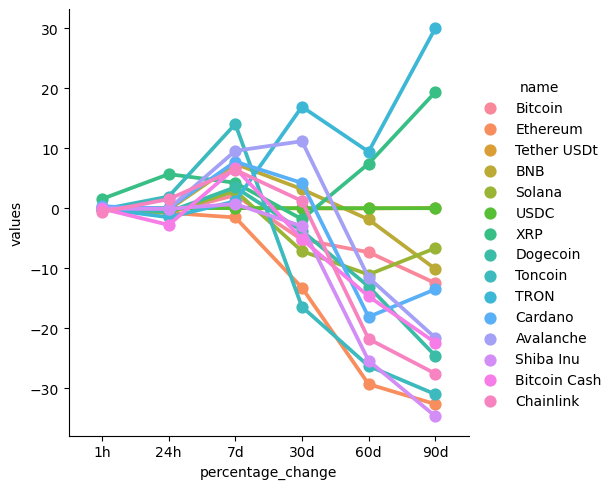

In [47]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')

In [59]:
df10=df[['name','quote.USD.price','timestamp']]
df10=df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,57927.59816,2024-09-13 04:37:52.078400


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

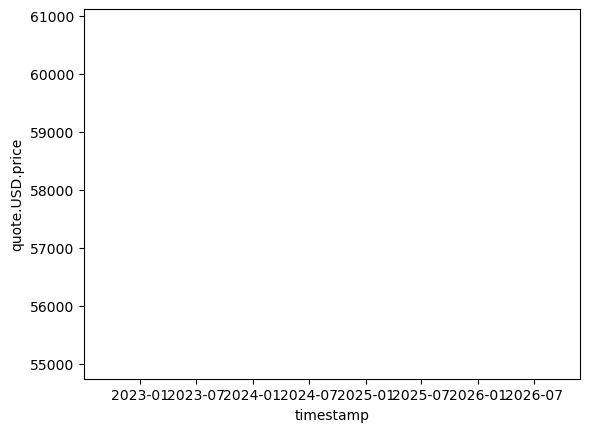

In [60]:
sns.lineplot(x='timestamp',y='quote.USD.price', data=df10)